In [1]:
import numpy, math
import matplotlib.pyplot as mpl

In [2]:
def recalculateClusters(data, clusters):
    k1_X_Total = 0.0
    k1_Y_Total = 0.0
    k1_number_of_points = 0

    k2_X_Total = 0.0
    k2_Y_Total = 0.0
    k2_number_of_points = 0

    for point in data:
    
        if point['clusterGroup'] == 'k1':
            k1_X_Total += point['x']
            k1_Y_Total += point['y']
            k1_number_of_points += 1
        if point['clusterGroup'] == 'k2':
            k2_X_Total += point['x']
            k2_Y_Total += point['y']
            k2_number_of_points += 1
 
    clusters[0][0] = k1_X_Total/k1_number_of_points
    clusters[0][1] = k1_Y_Total/k1_number_of_points

    clusters[1][0] = k2_X_Total/k2_number_of_points
    clusters[1][1] = k2_Y_Total/k2_number_of_points 

    return clusters

In [3]:
def reassignPoints(data, clusters):
    for point in data:
        distanceFromK1 = math.sqrt((clusters[0][0]-point['x'])*(clusters[0][0]-point['x']) +
                                   (clusters[0][1]-point['y'])*(clusters[0][1]-point['y']))
        
        distanceFromK2 = math.sqrt((clusters[1][0]-point['x'])*(clusters[1][0]-point['x']) +
                                   (clusters[1][1]-point['y'])*(clusters[1][1]-point['y']))
        

        shortestDistance = distanceFromK1
        clusterGroup = 'k1'

        if distanceFromK2 < shortestDistance:
            shortestDistance = distanceFromK2
            clusterGroup = 'k2'
            
        point['clusterGroup'] = clusterGroup
        
    return data

In [4]:
def calculateError(data,clusters):
    totalDistance = 0.0
    for point in data:
        if point['clusterGroup'] == 'k1':
            totalDistance += math.sqrt((clusters[0][0]-point['x'])*(clusters[0][0]-point['x']) +
                                       (clusters[0][1]-point['y'])*(clusters[0][1]-point['y']))
        if point['clusterGroup'] == 'k2':
            totalDistance += math.sqrt((clusters[1][0]-point['x'])*(clusters[1][0]-point['x']) +
                                       (clusters[1][1]-point['y'])*(clusters[1][1]-point['y']))
    return totalDistance

In [5]:
with open('hw3.dat') as f:
    initialData = []
    for line in f:
        temp = line.split()
        temp[0] = float(temp[0])
        temp[1] = float(temp[1])
        initialData.append(temp)

## initial clusters


In [6]:
k1 = initialData[1]
k2 = initialData[5]


clusters = [k1,k2]

Initial Conditions
Cluster 1 center: [7.89362608325696, 0.3319104175004391]
Cluster 2 center: [0.6409552432439407, 6.2926065054462565]


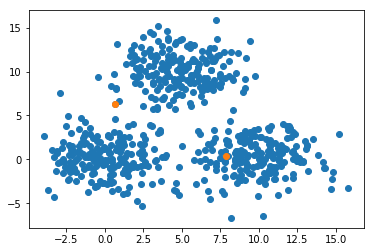

In [7]:
print('Initial Conditions')
mpl.scatter(numpy.array(initialData)[:,0],numpy.array(initialData)[:,1])
mpl.scatter(numpy.array(clusters)[:,0],numpy.array(clusters)[:,1])
i = 0
for cluster in clusters:
    i += 1
    print('Cluster ' + str(i) + ' center: ' + str(cluster))

In [8]:
data = []
#cluster =

for point in initialData:
    
    tempData = dict()
    
    distanceFromK1 = math.sqrt((k1[0]-point[0])*(k1[0]-point[0]) + (k1[1]-point[1])*(k1[1]-point[1]))
    distanceFromK2 = math.sqrt((k2[0]-point[0])*(k2[0]-point[0]) + (k2[1]-point[1])*(k2[1]-point[1]))
    

    
    shortestDistance = distanceFromK1
    clusterGroup = 'k1'
    
    if distanceFromK2 < shortestDistance:
        shortestDistance = distanceFromK2
        clusterGroup = 'k2'
     
        
    tempData['x']= point[0]
    tempData['y']= point[1]
    tempData['clusterGroup'] = clusterGroup
    
    data.append(tempData)



One Iteration
Cluster 1 center: [7.89362608325696, 0.3319104175004391]
Cluster 2 center: [0.6409552432439407, 6.2926065054462565]
Total distance from cluster centers: 3036.024023297063


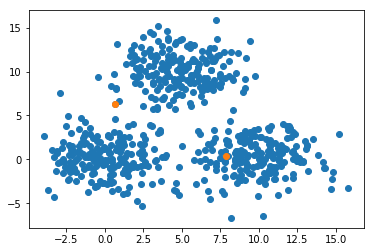

In [9]:
print('One Iteration')
mpl.scatter(numpy.array(initialData)[:,0],numpy.array(initialData)[:,1])
mpl.scatter(numpy.array(clusters)[:,0],numpy.array(clusters)[:,1])
i = 0
for cluster in clusters:
    i += 1
    print('Cluster ' + str(i) + ' center: ' + str(cluster))
print('Total distance from cluster centers: ' + str(calculateError(data,clusters)))

In [10]:
clusters = recalculateClusters(data, clusters)
data = reassignPoints(data, clusters)

Two Iterations
Cluster 1 center: [8.095123740086128, -0.10289403726328089]
Cluster 2 center: [2.4805633488059815, 6.227584039850299]
Total distance from cluster centers: 2901.814520263116


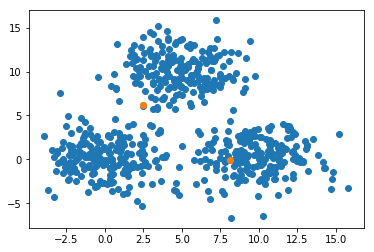

In [11]:
print('Two Iterations')
mpl.scatter(numpy.array(initialData)[:,0],numpy.array(initialData)[:,1])
mpl.scatter(numpy.array(clusters)[:,0],numpy.array(clusters)[:,1])
i = 0
for cluster in clusters:
    i += 1
    print('Cluster ' + str(i) + ' center: ' + str(cluster))
print('Total distance from cluster centers: ' + str(calculateError(data,clusters)))

In [12]:
clusters = recalculateClusters(data, clusters)
data = reassignPoints(data, clusters)

Three Iteration
Cluster 1 center: [8.091403832526572, -0.21971485000023983]
Cluster 2 center: [2.5484091980604977, 6.240533010689345]
Total distance from cluster centers: 2901.6863456352357


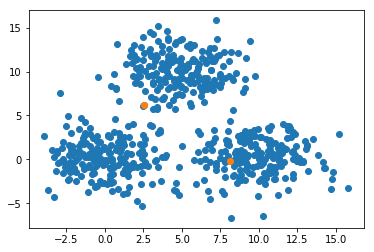

In [13]:
print('Three Iteration')
mpl.scatter(numpy.array(initialData)[:,0],numpy.array(initialData)[:,1])
mpl.scatter(numpy.array(clusters)[:,0],numpy.array(clusters)[:,1])
i = 0
for cluster in clusters:
    i += 1
    print('Cluster ' + str(i) + ' center: ' + str(cluster))
print('Total distance from cluster centers: ' + str(calculateError(data,clusters)))